### **Firstly we have to import all the library in starting**


In [ ]:
import pandas as pd  #Pandas is a powerful and popular Python library used for data manipulation and analysis.
import numpy as np   #numpy is a python library and provides support for large multiple dimensional array and matrix.
import matplotlib.pyplot as plt#matplotlib is used for creating statical,interactive visualizations.
import seaborn as sns #Seaborn is particularly useful for visualizing complex datasets and generating visually appealing plots with minimal code.

### **About the dataset "insurance.csv"**
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns).
The dataset contains 4 numerical features (age, bmi, children and charges) and 3 categorical features (sex, smoker and region)

Target variable : expenses
Objective : Predicting the expenses based on the given features of a individual.
An "insurance.csv" dataset typically contains information related to insurance policies and their associated attributes. These datasets are commonly used for various data analysis and machine learning tasks. Here are some common features that may be present in an insurance dataset:

1)Age: The age of the insured person.

2)Sex: The gender of the insured person.

3)BMI (Body Mass Index): A measure of body fat based on height and weight.

4)Children: The number of children or dependents covered by the insurance policy.

5)Smoker: Whether the insured person is a smoker or a non-smoker.

6)Region: The geographical region of the insured person's residence.

7)Charges: The insurance charges or premiums paid by the insured person.



### **Then we have to read the csv file**

In [ ]:
df=pd.read_csv("insurance.csv")#we are using data from the file "HEALTH CARE DIABETES" and read it.
df.head()#head() it is used to display the top few rows of dataframe or series.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()#it provieds essential information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.tail()#it is used to display the bottom few rows of dataframe or series

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.describe()#it describes the statical data.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#checking for a missing value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data_categorical=df.loc[:,df.dtypes== object]
data_categorical

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


### **EDA(Exploratory Data Analysis)**

know we are using the EDA (Exploratory Data Analysis)
 as per our choice for suitable diabetes dataset for depends on the specific goals of your analysis and the type of data you want to visualize.

<Axes: ylabel='count'>

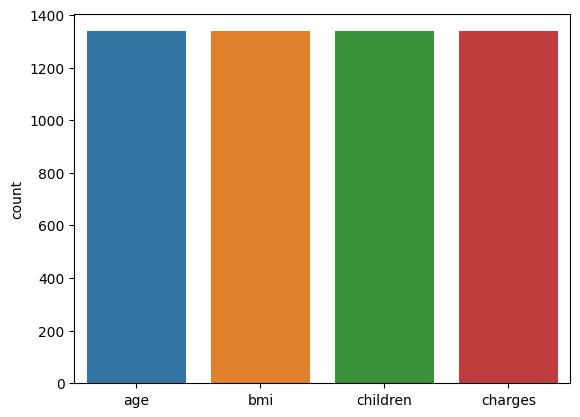

In [ ]:
sns.countplot(data=df)#its easy to find the levels easily by seeing the colours representing each of the following.

Countplot:-
A countplot is a type of bar plot in data visualization that displays the count of occurrences of each category in a categorical variable.

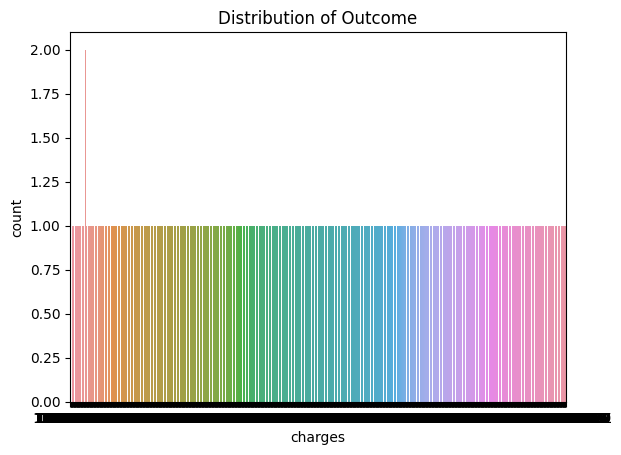

In [ ]:
sns.countplot(x='charges', data=df)
plt.title('Distribution of Outcome')#it gives title to the countplot
plt.show()#to see the plot

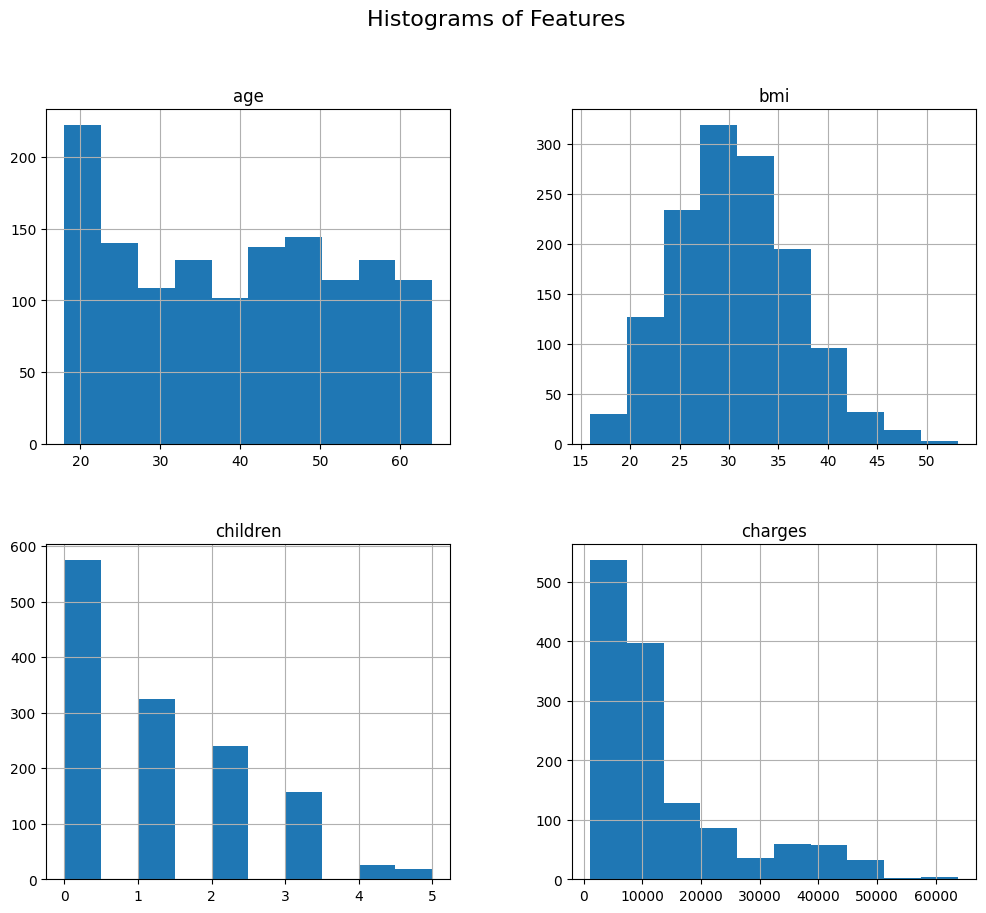

In [ ]:
# Create a histogram for each numeric feature.
df.hist(figsize=(12, 10))#it is used to create histogram for all the numerical column
plt.suptitle('Histograms of Features', fontsize=16)#it gives title to all the histgram
plt.show()#it will show the plot

<ipython-input-15-9376309005aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()#the correlation coefficient between every pair of numeric columns in the DataFrame.


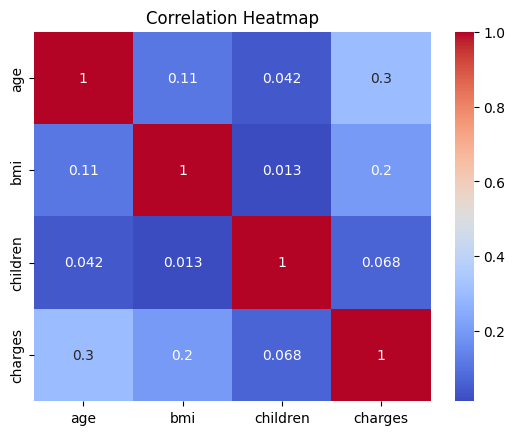

In [ ]:
 #Generate a correlation matrix and plot it as a heatmap.
correlation_matrix = df.corr()#the correlation coefficient between every pair of numeric columns in the DataFrame.
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=True)# heatmap is used to represent the numerical data in colors.
#cmap:-Represent the colour map
plt.title('Correlation Heatmap')
plt.show()


### **Converting categorical into numerical**

In [ ]:
df.head()#it shows top 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
df = pd.DataFrame(df)   ##df = pd.DataFrame(file name)
df=df.drop(['sex'],axis=1)

In [ ]:
df.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,1,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,3,21984.47061
4,32,28.880,0,0,3,3866.85520


### **Training and Testing Data**

In [ ]:
X = df[['age', 'bmi', 'children']]
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

### **Print out the coefficients of the model**

In [ ]:
linreg.fit(X ,y)

LinearRegression()

In [ ]:
coefficients = linreg.coef_

In [ ]:
# Print the coefficients
print("Coefficients:", coefficients)

Coefficients: [239.99447429 332.0833645  542.86465225]


In [ ]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)#predict

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("R2 score: ",(r2_score(y_test, pred)))
#the context of machine learning and data analysis to assess how well ,
#a regression model predicts the variability of the dependent variable (target) based on the independent variables (features).

R2 score:  0.15489592484270776


In [ ]:
X_train

,age,bmi,children
560,46,19.950,2
1285,47,24.320,0
1142,52,24.860,0
969,39,34.320,5
486,54,21.470,3
...,...,...,...
1095,18,31.350,4
1130,39,23.870,5
1294,58,25.175,0
860,37,47.600,2


In [ ]:
X_test

,age,bmi,children
764,45,25.175,2
887,36,30.020,0
890,64,26.885,0
1293,46,25.745,3
259,19,31.920,0
...,...,...,...
109,63,35.090,0
575,58,27.170,0
535,38,28.025,1
543,54,47.410,0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Make predictions on the entire dataset
predictions = linreg.predict(X)


In [ ]:
# Calculate metrics
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)
r2 = r2_score(y, predictions)


In [ ]:
# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 9041.037356926166
Mean Squared Error (MSE): 129021087.7875719
Root Mean Squared Error (RMSE): 11358.744991748512
R-squared (R2) Score: 0.11956699825745054


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
linreg.fit(X_train, y_train)

# Make predictions on the testing data
predictions_test = linreg.predict(X_test)

# Calculate metrics on the testing data
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)
r2_test = r2_score(y_test, predictions_test)

# Print the metrics on testing data
print("Testing Set - Mean Absolute Error (MAE):", mae_test)
print("Testing Set - Mean Squared Error (MSE):", mse_test)
print("Testing Set - Root Mean Squared Error (RMSE):", rmse_test)
print("Testing Set - R-squared (R2) Score:", r2_test)







Testing Set - Mean Absolute Error (MAE): 9181.311632897381
Testing Set - Mean Squared Error (MSE): 131201335.64669803
Testing Set - Root Mean Squared Error (RMSE): 11454.315153980095
Testing Set - R-squared (R2) Score: 0.15489592484270776


### **prediction**

In [ ]:
# Get user input for prediction
user_age = float(input("Enter the age: "))
user_bmi = float(input("Enter the BMI: "))
user_children = int(input("Enter the number of children: "))

# Create a DataFrame with the user input
user_data = pd.DataFrame({
    'age': [user_age],
    'bmi': [user_bmi],
    'children': [user_children]
})

# Use the trained model to make a prediction on the user input
prediction = linreg.predict(user_data)

# Print the prediction
print("Predicted charges:", prediction[0])

Enter the age: 14
Enter the BMI: 22.4
Enter the number of children: 3
Predicted charges: 6102.956293786279
